<a href="https://colab.research.google.com/github/Charmaineem/ML/blob/main/Tweets_Claffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweets Sentiment Analysis using Text Classification

Sentiment analysis via text classifaction using DistilBERT. It has 40% less parameters than Bert-base-uncased, runs 60% faster while preserving over 95% of BERT's performances.

###The Dataset

Emotions dataset with 6 basic emotions: sad, anger, fear, joy, love

In [6]:
!pip install transformers --quiet
!pip install datasets --quiet

In [7]:
from datasets import load_dataset

In [8]:
emotions = load_dataset('emotion')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [9]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

### Visualisation of the Dataset

In [20]:
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [25]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

In [26]:
df['label_name'] = df['label'].apply(label_int2str)
df.head()

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

In [27]:
import matplotlib.pyplot as plt

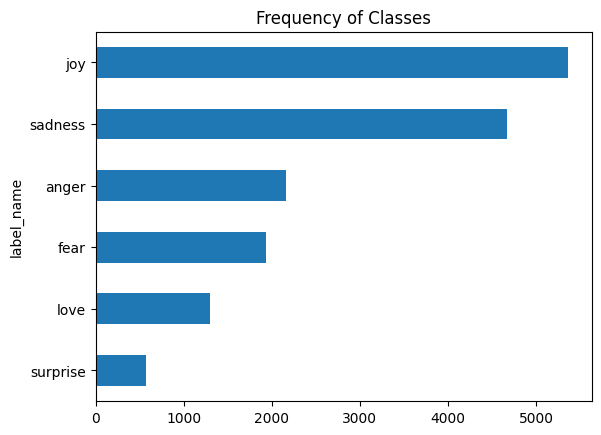

In [37]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

The dataset is not balanced. To deal with unbalanced data one can


*   randomly oversample the minority class
* randomly undersample the majority class
* gather more data

However in this project, I will work with the data as is!


#### Mazimum Context Size

Transformer models have a maximum input sequence length and for DistillBert it is 512 tokens. Anything above this needs to be cutoff leading to loss of information

In [38]:
df.columns

Index(['text', 'label', 'label_name'], dtype='object')

In [54]:
df['Words per tweet'] = df['text'].str.split().apply(len)
df.head()

text  label label_name  \
0                            i didnt feel humiliated      0    sadness   
1  i can go from feeling so hopeless to so damned...      0    sadness   
2   im grabbing a minute to post i feel greedy wrong      3      anger   
3  i am ever feeling nostalgic about the fireplac...      2       love   
4                               i am feeling grouchy      3      anger   

   Words per tweet  
0                4  
1               21  
2               10  
3               18  
4                4

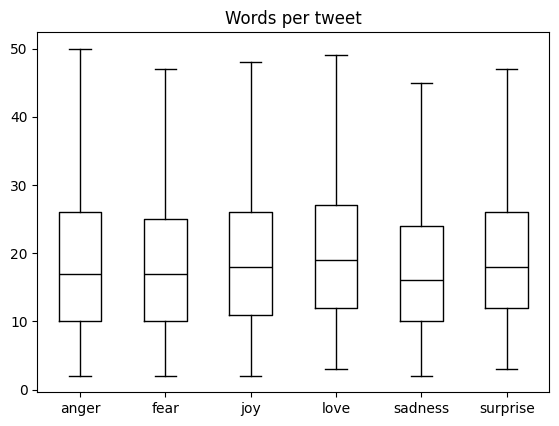

In [55]:
df.boxplot('Words per tweet', by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

Most tweets throughout the six emotions have length around 15

In [56]:
emotions.reset_format()